In [5]:
library(dplyr)
library(ggplot2)

Warning message:
“package ‘dplyr’ was built under R version 3.6.3”
Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [1]:
data<-read.csv("data/Data_dataframes/final_plotting_01_2x_coverage_2021_04_21.csv")

In [4]:
data[0:10,]

X,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder
TGC,TGC,2.997258e-05,-4.523276,0.16123598,0.0017735668,-0.16158807,0.0018922536,107.3,1.0592922,86.5,0.9728823,2829.1,4.954886,2604.6,4.115872
GCG,GCG,2.930548e-04,-3.533051,-0.67161303,0.0018473659,-0.93597904,0.0009198943,551.6,1.4354093,82.6,0.6374951,2731.5,4.436271,1965.0,4.531666
CGG,CGG,2.844044e-04,-3.546064,-0.64147648,0.0010769567,-0.93872612,0.0006920651,577.3,1.9519477,96.5,0.5766281,2744.0,4.376985,2220.9,4.658852
AGA,AGA,2.956725e-05,-4.529189,0.12261535,0.0013208597,0.32761936,0.0023909971,97.5,1.1884864,63.9,0.3389690,3891.4,7.145236,3173.0,4.499333
GTT,GTT,2.080387e-05,-4.681856,0.02829579,0.0014799393,0.38077903,0.0050448413,64.8,1.0186265,134.0,1.2181954,2683.8,6.229414,3448.9,6.014890
TTG,TTG,1.670667e-05,-4.777110,0.28383613,0.0012486927,0.61579967,0.0042074702,63.1,0.6579514,498.2,1.4572577,2669.7,4.138128,3620.7,5.402601
GTG,GTG,2.072125e-05,-4.683584,0.16305235,0.0027589993,-0.04711218,0.0034112188,73.7,0.6841783,516.2,1.6092234,2187.1,5.428342,2928.4,4.677008
ATA,ATA,3.830079e-05,-4.416792,0.10538594,0.0018820404,0.42109013,0.0046723400,131.0,0.9132360,131.4,0.9167333,5283.2,4.907504,5757.5,8.692439
TAA,TAA,1.992631e-05,-4.700573,0.05088201,0.0009499321,0.77776630,0.0061435902,67.8,0.8219489,86.0,0.9230385,3180.2,7.653208,3689.9,6.810499
TGA,TGA,2.548388e-05,-4.593734,0.34138427,0.0021520410,0.51702401,0.0054812191,92.9,0.9374967,73.3,0.8820998,3938.1,7.014906,3373.1,8.118183


In [12]:
cpg_trips = c("ACG","TCG","CCG","GCG","CGA","CGT","CGC","CGG")
cpg_yes_no <- function(triplet) {
#   if (triplet %in% cpg_trips) return("CpG") else return("non CpG")
  ifelse(triplet %in% cpg_trips, return("CpG"), return("non CpG"))
}

In [17]:
cpg_yes_no(data$triplet)

[1] "CpG"

In [15]:
data %>% 
    mutate(cpg_status = cpg_yes_no(triplet))%>% 
head()

X,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder,cpg_status
TGC,TGC,2.997258e-05,-4.523276,0.16123598,0.001773567,-0.1615881,0.0018922536,107.3,1.0592922,86.5,0.9728823,2829.1,4.954886,2604.6,4.115872,CpG
GCG,GCG,2.930548e-04,-3.533051,-0.67161303,0.001847366,-0.9359790,0.0009198943,551.6,1.4354093,82.6,0.6374951,2731.5,4.436271,1965.0,4.531666,CpG
CGG,CGG,2.844044e-04,-3.546064,-0.64147648,0.001076957,-0.9387261,0.0006920651,577.3,1.9519477,96.5,0.5766281,2744.0,4.376985,2220.9,4.658852,CpG
AGA,AGA,2.956725e-05,-4.529189,0.12261535,0.001320860,0.3276194,0.0023909971,97.5,1.1884864,63.9,0.3389690,3891.4,7.145236,3173.0,4.499333,CpG
GTT,GTT,2.080387e-05,-4.681856,0.02829579,0.001479939,0.3807790,0.0050448413,64.8,1.0186265,134.0,1.2181954,2683.8,6.229414,3448.9,6.014890,CpG
TTG,TTG,1.670667e-05,-4.777110,0.28383613,0.001248693,0.6157997,0.0042074702,63.1,0.6579514,498.2,1.4572577,2669.7,4.138128,3620.7,5.402601,CpG


# **R scrpt to make linear regression**

In [4]:
head(data)

X,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder
TGC,TGC,2.997258e-05,-4.523276,0.16123598,0.001773567,-0.1615881,0.0018922536,107.3,1.0592922,86.5,0.9728823,2829.1,4.954886,2604.6,4.115872
GCG,GCG,2.930548e-04,-3.533051,-0.67161303,0.001847366,-0.9359790,0.0009198943,551.6,1.4354093,82.6,0.6374951,2731.5,4.436271,1965.0,4.531666
CGG,CGG,2.844044e-04,-3.546064,-0.64147648,0.001076957,-0.9387261,0.0006920651,577.3,1.9519477,96.5,0.5766281,2744.0,4.376985,2220.9,4.658852
AGA,AGA,2.956725e-05,-4.529189,0.12261535,0.001320860,0.3276194,0.0023909971,97.5,1.1884864,63.9,0.3389690,3891.4,7.145236,3173.0,4.499333
GTT,GTT,2.080387e-05,-4.681856,0.02829579,0.001479939,0.3807790,0.0050448413,64.8,1.0186265,134.0,1.2181954,2683.8,6.229414,3448.9,6.014890
TTG,TTG,1.670667e-05,-4.777110,0.28383613,0.001248693,0.6157997,0.0042074702,63.1,0.6579514,498.2,1.4572577,2669.7,4.138128,3620.7,5.402601


In [ ]:
descript_header = ["yvar","xvar","typeReg","adjRsq","pVal"]
model_desc = ["countsChosen_01_mean", "mut", "linear",0.9885,2.2e-16] #everything looks good assumption wise 
model1_desc = ["change_2_mean", "mut_log10", "linear", 0.3686,6.286e-08] #hmm things look mostly ok assumtpion wise. the biggest issue is heteroscadasticity but i think thats unavoidable given the shape fo the data 

In [10]:
model1 <- lm(countsInto_01_mean~mut_log10, data = data)

In [6]:
res<-resid(model1)

In [11]:
summary(model1)


Call:
lm(formula = countsInto_01_mean ~ mut_log10, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-109.01  -82.68  -62.89  -23.39  546.02 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  -111.37     241.35  -0.461    0.646
mut_log10     -60.06      53.97  -1.113    0.270

Residual standard error: 163.4 on 62 degrees of freedom
Multiple R-squared:  0.01959,	Adjusted R-squared:  0.003773 
F-statistic: 1.239 on 1 and 62 DF,  p-value: 0.27


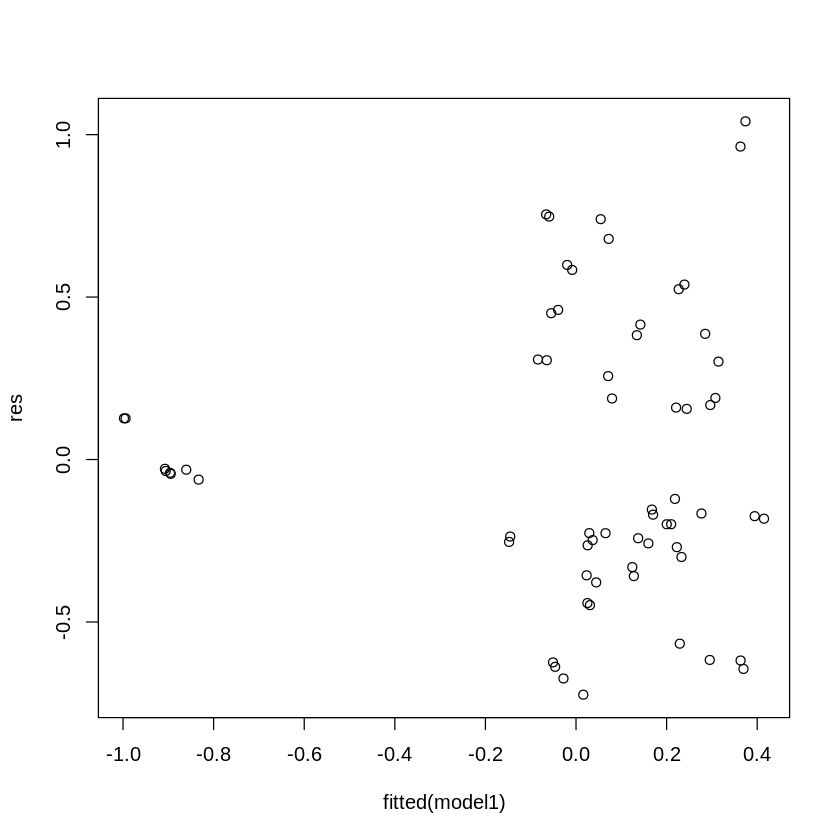

In [90]:
plot(fitted(model1), res)
# png("plots/regression/countsChosen01mean_mut_linear_residuals_2021_05_01.png")
# plot(rnorm(20))
# dev.off()

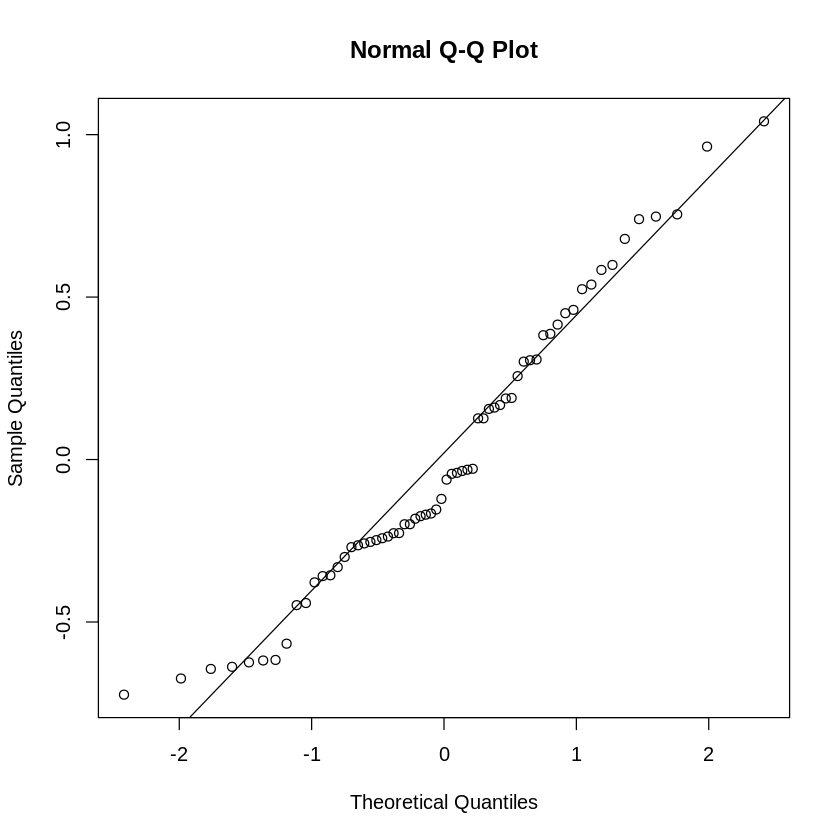

In [91]:
qqnorm(res)
qqline(res)
# png("plots/regression/countsChosen01mean_mut_linear_QQplot_2021_05_01.png")
# plot(rnorm(20))
# dev.off()

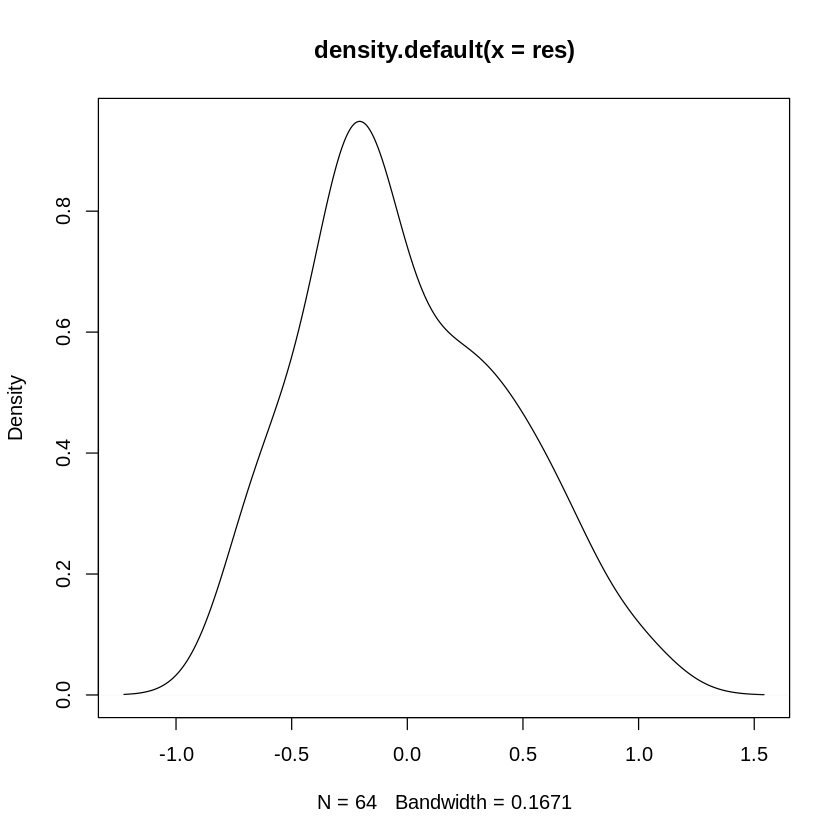

In [92]:
plot(density(res))
# png("plots/regression/countsChosen01mean_mut_linear_density_2021_05_01.png")
# plot(rnorm(20))
# dev.off()

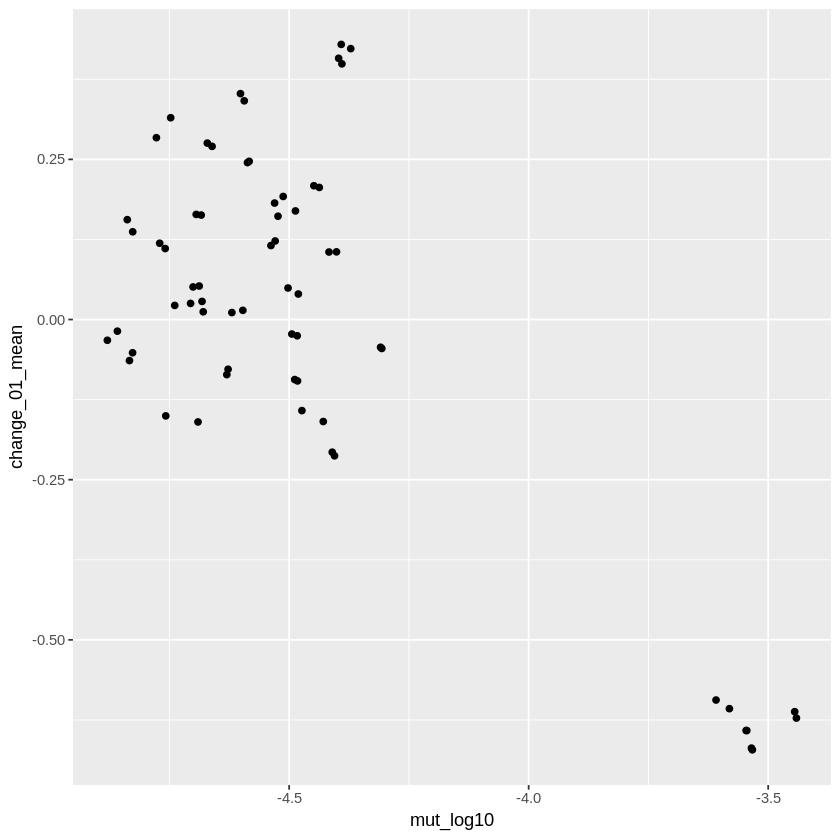

In [93]:
ggplot(data, aes(mut_log10, change_01_mean))+
    geom_point(color = "black") 

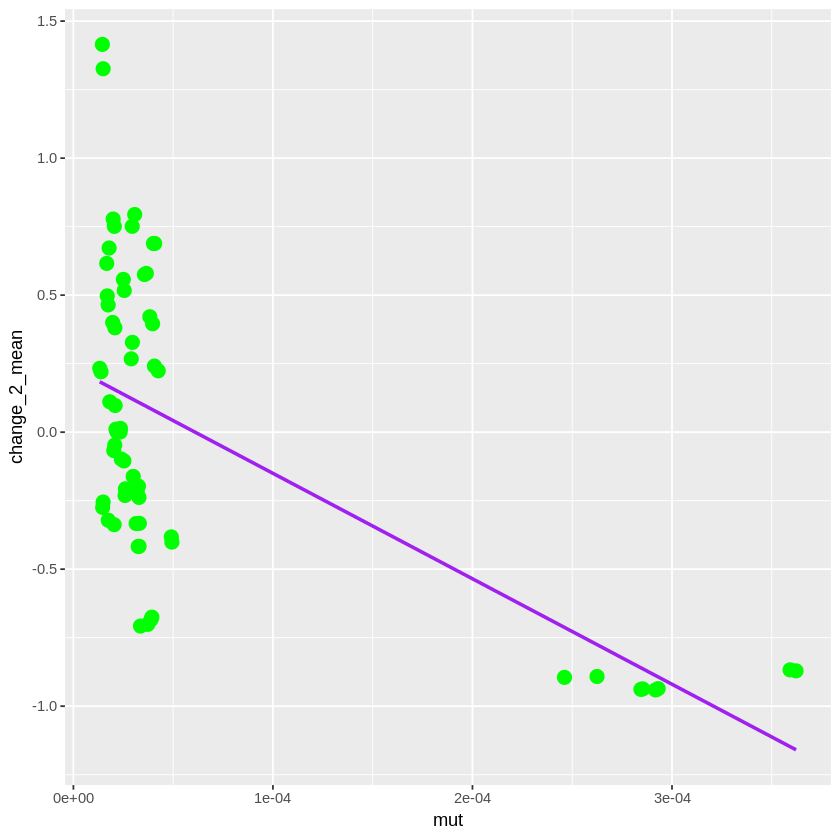

In [96]:
ggplot(data, aes(mut, change_2_mean)) +
# Orignal points of dataset 
  geom_point(color = "green", size = 3.6) + 
# Implementation of lm()
  geom_smooth(method='lm', formula= y~x, se=FALSE, col="purple", lwd=1) 
# 5th degree ploynomial model
#   geom_smooth(method='lm', formula= y~poly(x,2), se=FALSE, col="brown")

# **regression without CpGs**

In [4]:
data <- as_tibble(data)

In [5]:
head(data)

X,triplet,mut,mut_log10,change_01_mean,change_early_stder,change_2_mean,change_2_stder,countsChosen_01_mean,countsChosen_01_stder,countsInto_01_mean,countsInto_01_stder,countsChosen_2_mean,countsChosen_2_stder,countsInto_2_mean,countsInto_2_stder
TGC,TGC,2.997258e-05,-4.523276,0.16123598,0.001773567,-0.1615881,0.0018922536,107.3,1.0592922,86.5,0.9728823,2829.1,4.954886,2604.6,4.115872
GCG,GCG,2.930548e-04,-3.533051,-0.67161303,0.001847366,-0.9359790,0.0009198943,551.6,1.4354093,82.6,0.6374951,2731.5,4.436271,1965.0,4.531666
CGG,CGG,2.844044e-04,-3.546064,-0.64147648,0.001076957,-0.9387261,0.0006920651,577.3,1.9519477,96.5,0.5766281,2744.0,4.376985,2220.9,4.658852
AGA,AGA,2.956725e-05,-4.529189,0.12261535,0.001320860,0.3276194,0.0023909971,97.5,1.1884864,63.9,0.3389690,3891.4,7.145236,3173.0,4.499333
GTT,GTT,2.080387e-05,-4.681856,0.02829579,0.001479939,0.3807790,0.0050448413,64.8,1.0186265,134.0,1.2181954,2683.8,6.229414,3448.9,6.014890
TTG,TTG,1.670667e-05,-4.777110,0.28383613,0.001248693,0.6157997,0.0042074702,63.1,0.6579514,498.2,1.4572577,2669.7,4.138128,3620.7,5.402601


In [9]:
data_noCpG <-filter(data, mut <= 2e-04)

In [11]:
model_noCpG <- lm(change_2_mean~mut, data = data_noCpG)

In [12]:
model <- lm(change_2_mean~mut, data = data)

In [13]:
summary(model_noCpG)


Call:
lm(formula = change_2_mean ~ mut, data = data_noCpG)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7385 -0.3202 -0.1660  0.3666  1.0843 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)  5.588e-01  1.950e-01   2.865  0.00593 **
mut         -1.570e+04  6.740e+03  -2.329  0.02361 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4708 on 54 degrees of freedom
Multiple R-squared:  0.09131,	Adjusted R-squared:  0.07448 
F-statistic: 5.426 on 1 and 54 DF,  p-value: 0.02361


In [14]:
summary(model)


Call:
lm(formula = change_2_mean ~ mut, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81274 -0.34228 -0.06517  0.31729  1.23634 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.346e-01  6.867e-02   3.416  0.00113 ** 
mut         -3.849e+03  6.261e+02  -6.146 6.29e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4558 on 62 degrees of freedom
Multiple R-squared:  0.3786,	Adjusted R-squared:  0.3686 
F-statistic: 37.78 on 1 and 62 DF,  p-value: 6.286e-08
